In [1]:
import matplotlib.pyplot as plt
from utils import *
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [2]:
!python -m serial.tools.list_ports

no ports found


In [3]:
daq_port = '/dev/ttyUSB0'

In [9]:
measurements = read_measurements_df_6axis(port=daq_port, duration=5) 

<Axes: xlabel='Time'>

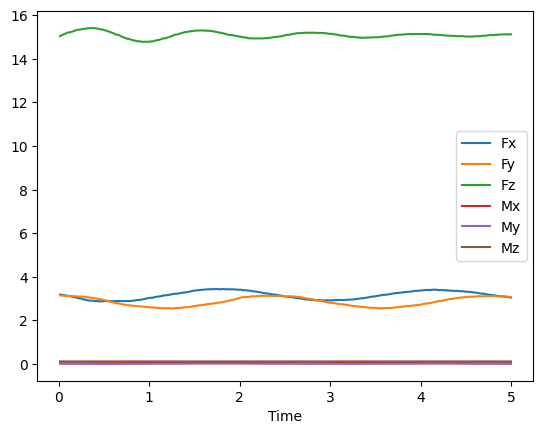

In [10]:
measurements.plot(x='Time')

measurements = read_measurements_df_6axis(port=daq_port, duration=5)
measurements['Time'] = 0 
calib = measurements.mean() 
calib.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/calib.csv')

In [21]:
calib = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/231207/data/calib.csv', index_col=0).iloc[:,0]

In [27]:
# motor: 240-350 legs untied
measurements = read_measurements_df_6axis(port=daq_port, duration=30) - calib

In [65]:
measurements.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements.csv')

In [29]:
# motor: 240-350 legs tied
measurements_1 = read_measurements_df_6axis(port=daq_port, duration=30) - calib

In [66]:
measurements_1.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements_1.csv')


In [40]:
# motor: 240-380 legs tied
measurements_2 = read_measurements_df_6axis(port=daq_port, duration=30) - calib

In [67]:
measurements_2.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements_2.csv')


In [49]:
# motor: 240-400 legs tied
measurements_3 = read_measurements_df_6axis(port=daq_port, duration=30) - calib

In [68]:
measurements_3.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements_3.csv')


In [58]:
# motor: 240-400 legs tied, tied on nose (others were on forehead)
measurements_4 = read_measurements_df_6axis(port=daq_port, duration=30) - calib

In [69]:
measurements_4.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements_4.csv')

In [74]:
# motor: 240-400 legs tied, tied on nose (others were on forehead)
measurements_5 = read_measurements_df_6axis(port=daq_port, duration=20) - calib
measurements_5.to_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements_5.csv')

In [16]:
measurements = pd.read_csv('/home/anuarsantoyo/PycharmProjects/Batbot/analysis/dynamic_forces/240107/data/measurements_4.csv')

In [17]:
px.line(measurements, x='Time', y=['Fx', 'Fy', 'Fz'])

In [63]:
np.sqrt(7**2+53**2)

53.46026561849464

In [64]:
(6.3-1)/6.3

0.8412698412698413

<Axes: xlabel='Time'>

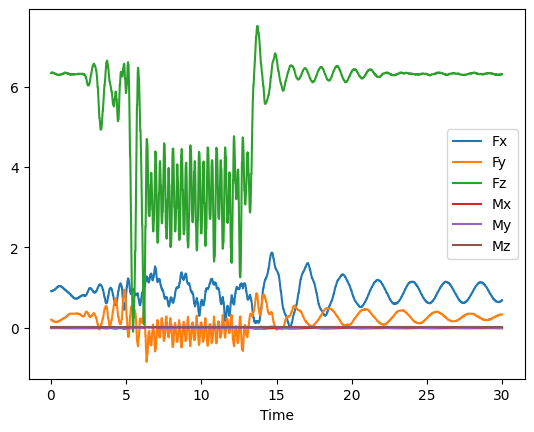

In [34]:
measurements_1.plot(x='Time')

In [14]:
measurements.Fz = -measurements.Fz
measurements['Fres'] = np.sqrt(measurements.Fx**2 + measurements.Fy**2 + measurements.Fz**2)
#lo = 96
#l1 = 109
c = (109-96)/6.55
l = lambda x:  96 + c*x
def pos(df):
    length = l(df.Fres)
    normalized_x = df.Fx / df.Fres
    normalized_y = df.Fy / df.Fres
    normalized_z = df.Fz / df.Fres
    
    new_x = normalized_x * length
    new_y = normalized_y * length
    new_z = normalized_z * length
    
    return new_x, new_y, new_z
    
measurements[['x','y','z']] = measurements.apply(pos,axis=1,  result_type='expand')
fig = px.scatter_3d(measurements, x='x', y='y', z='z')

# Set the axes to have the same scale
fig.update_layout(
    scene=dict(
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=1),
        xaxis=dict(range=[-150, 150]),  # X-axis limits
        yaxis=dict(range=[-150, 150]),  # Y-axis limits
        zaxis=dict(range=[-150, 0])   # Z-axis limits
    )
)
#fig.write_html('position.html')
fig.show()

fig = px.scatter_3d(measurements, x='Fx', y='Fy', z='Fz')

# Set the axes to have the same scale
fig.update_layout(
    scene=dict(
        aspectmode='cube'
        
    )
)
fig.show()
#fig.write_html('force.html')

In [7]:
measurements = read_measurements_df_6axis(port=daq_port, duration=30) - calib

In [9]:
measurements.Fz = -measurements.Fz

In [11]:
fig = px.scatter_3d(measurements, x='Fx', y='Fy', z='Fz', color='Time')

# Set the axes to have the same scale
fig.update_layout(
    scene=dict(
        aspectmode='cube'
        
    )
)measurements.Fz = -measurements.Fz
fig.show()

<Axes: xlabel='Time'>

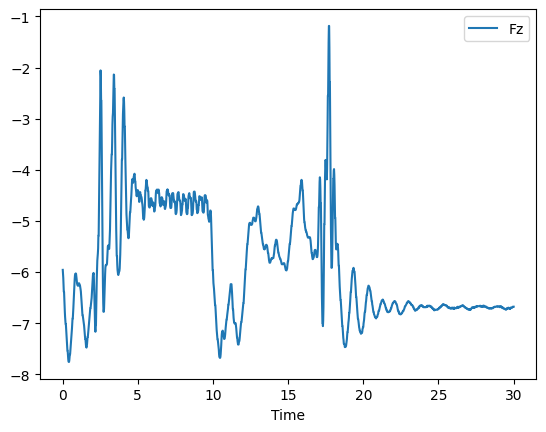

In [12]:
measurements.plot(x='Time', y='Fz')